In [2]:
from matplotlib import pyplot as plt
%matplotlib notebook
import numpy as np
from skimage.io import imread,imsave

<IPython.core.display.Javascript object>


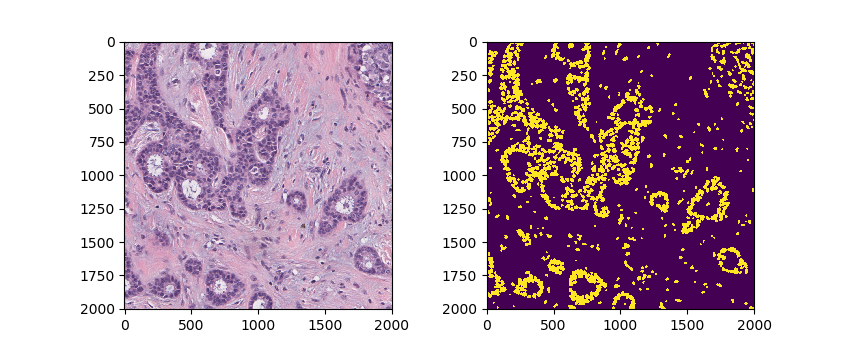

In [4]:
im = imread('nuclei1.tif')
mask = imread('nuclei_mask.png')>0

plt.figure()
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(mask)
plt.show()

352


<IPython.core.display.Javascript object>


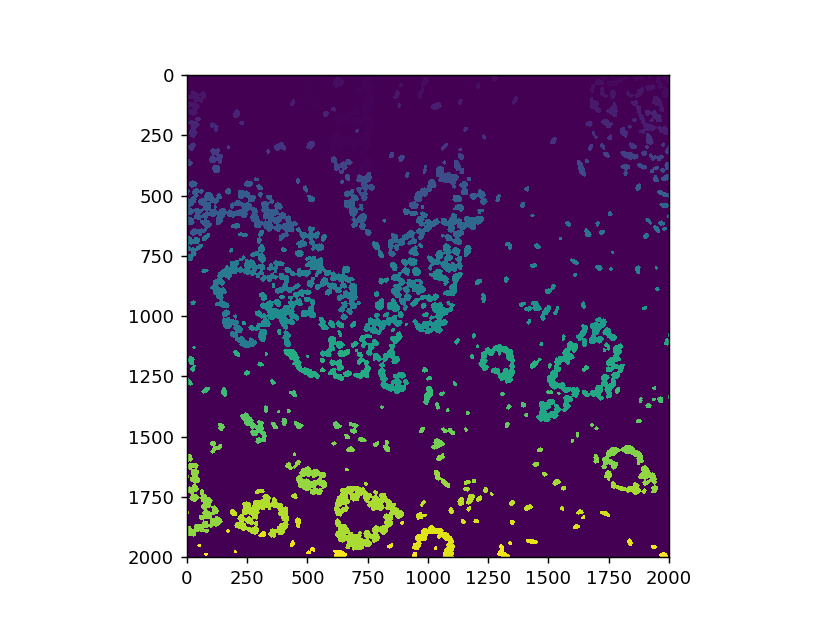

In [14]:
from skimage.measure import label

lab = label(mask, connectivity=2)
print(lab.max())

plt.figure()
plt.imshow(lab)
plt.show()

<IPython.core.display.Javascript object>


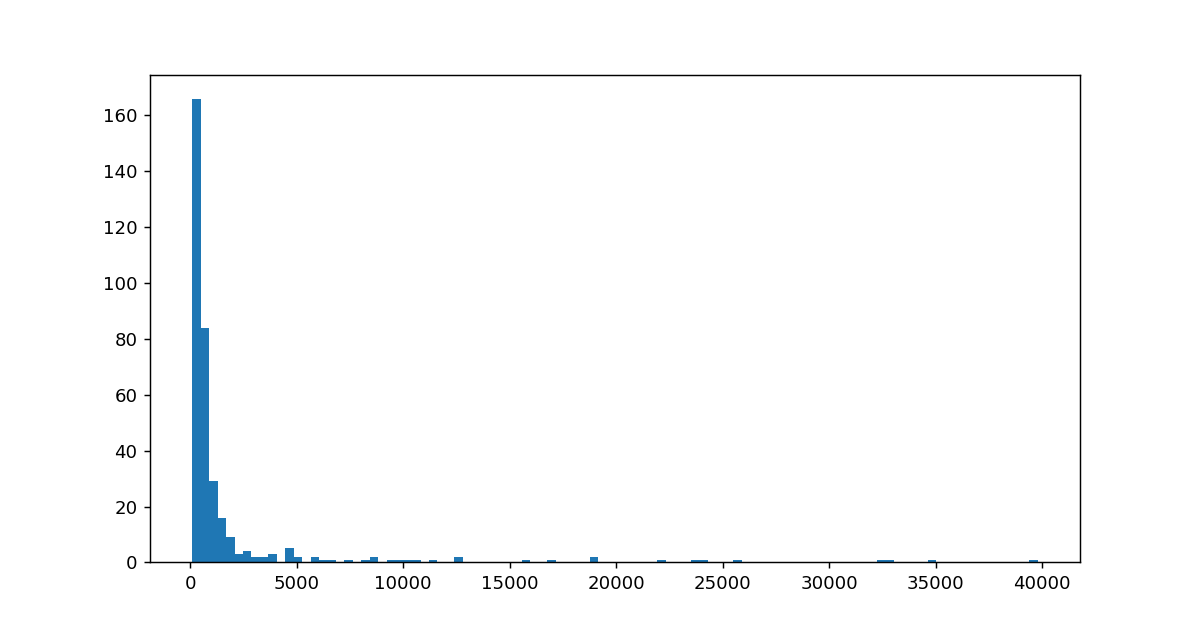

In [15]:
# histogram of sizes:
obj_sizes = []
for i in range(1,lab.max()+1):
    obj_sizes += [(lab==i).sum()]
obj_sizes = np.array(obj_sizes)

plt.figure()
plt.hist(obj_sizes, bins=100)
plt.show()

<IPython.core.display.Javascript object>


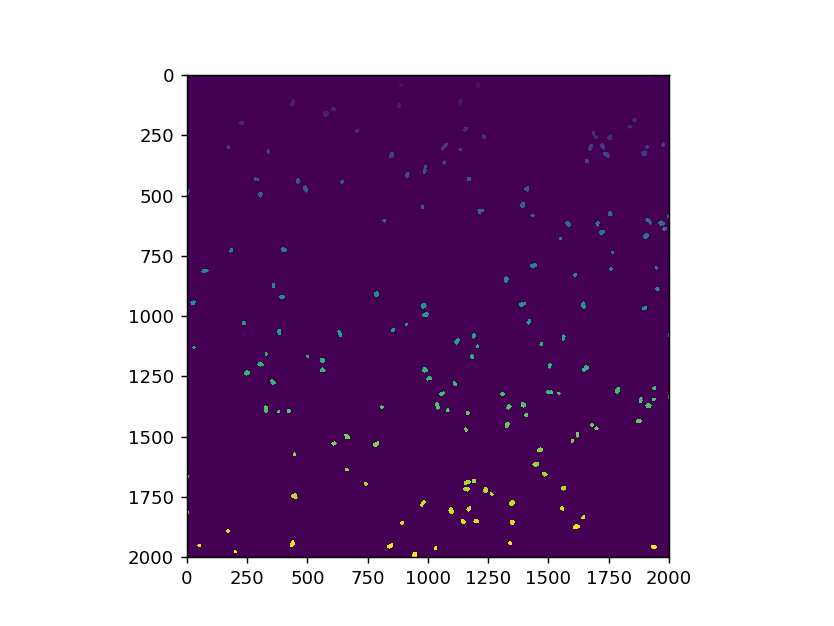

In [18]:
lab_small = np.zeros_like(lab)
for i in range(1,lab.max()):
    if( (lab==i).sum() < 500 ):
        lab_small[lab==i] = i

plt.figure()
plt.imshow(lab_small)
plt.show()

In [22]:
print(mask.sum()/500)

1392.916


In [23]:
from skimage.measure import regionprops

props = regionprops(lab)

<IPython.core.display.Javascript object>


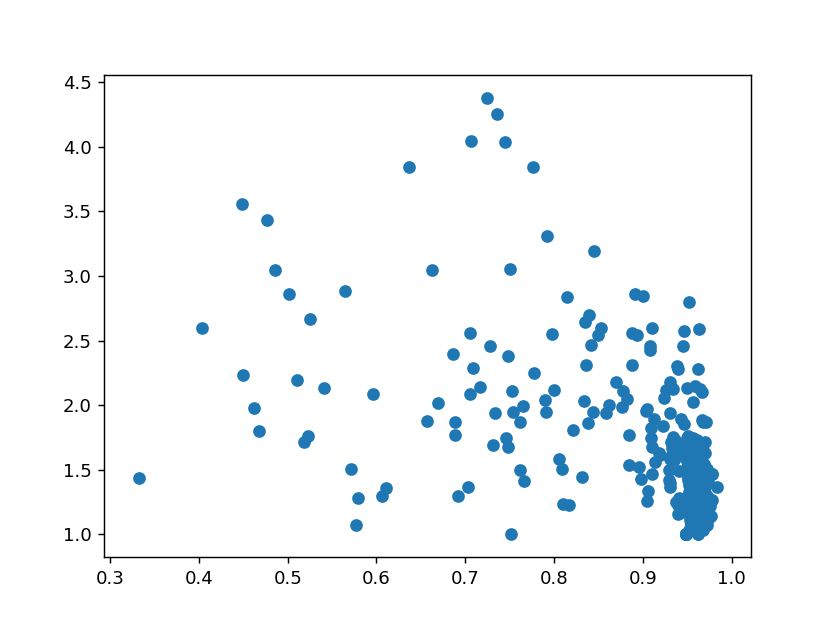

<IPython.core.display.Javascript object>


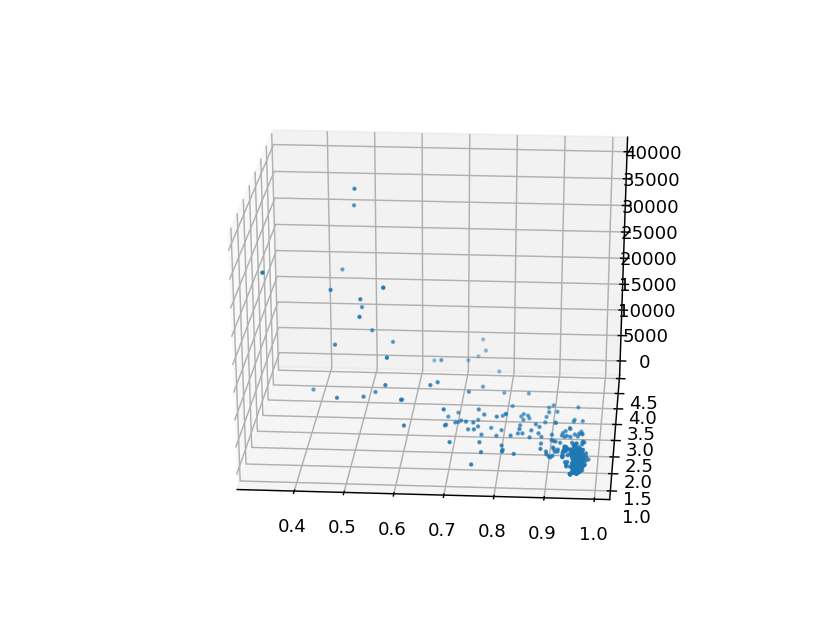

In [25]:
features = np.zeros((lab.max(),3))
for obj in props:
    features[obj.label-1,:] = [obj.solidity, (obj.major_axis_length+1)/(obj.minor_axis_length+1), obj.area]

plt.figure()
plt.scatter(features[:,0], features[:,1])
plt.show()

from mpl_toolkits.mplot3d import Axes3D

def scatter_3d(coords):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(coords[:,0], coords[:,1], coords[:,2], s=2)
    plt.show()

scatter_3d(features)

<IPython.core.display.Javascript object>


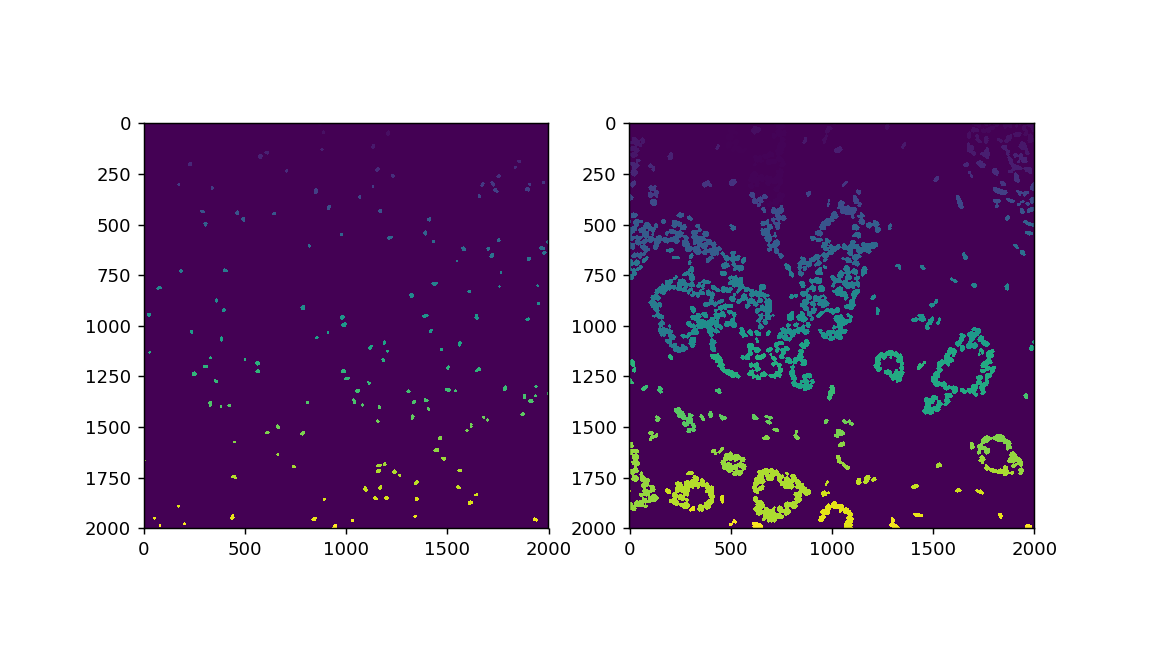

In [26]:
min_solidity = 0.9
max_axis = 1.75
max_area = 500
idobjs = np.arange(1,lab.max()+1)
idsmall = idobjs[(features[:,0] > min_solidity)*(features[:,1] < max_axis)*(features[:,2] < max_area)]
idlarge = idobjs[False==((features[:,0] > min_solidity)*(features[:,1] < max_axis)*(features[:,2] < max_area))]

lab_small = np.zeros_like(lab)
lab_large = np.zeros_like(lab)
for i in idsmall:
    lab_small[lab==i] = i
for i in idlarge:
    lab_large[lab==i] = i

plt.figure()
plt.subplot(1,2,1)
plt.imshow(lab_small)
plt.subplot(1,2,2)
plt.imshow(lab_large)
plt.show()

<IPython.core.display.Javascript object>


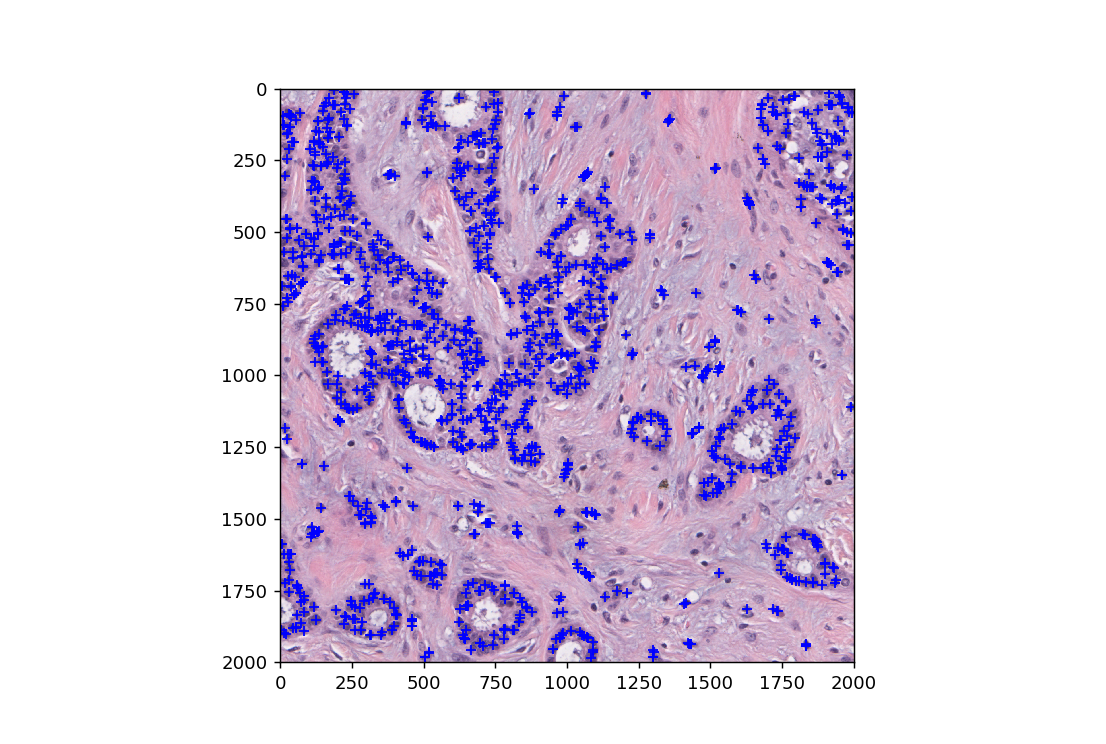

In [27]:
from scipy.ndimage import distance_transform_edt
from skimage.feature import peak_local_max

mask = lab_large > 0
distance = distance_transform_edt(mask)

markers = peak_local_max(distance, min_distance=3, indices=True)

plt.figure()
plt.imshow(im)
for m in markers:
    plt.plot(m[1],m[0],'b+')
plt.show()

<IPython.core.display.Javascript object>


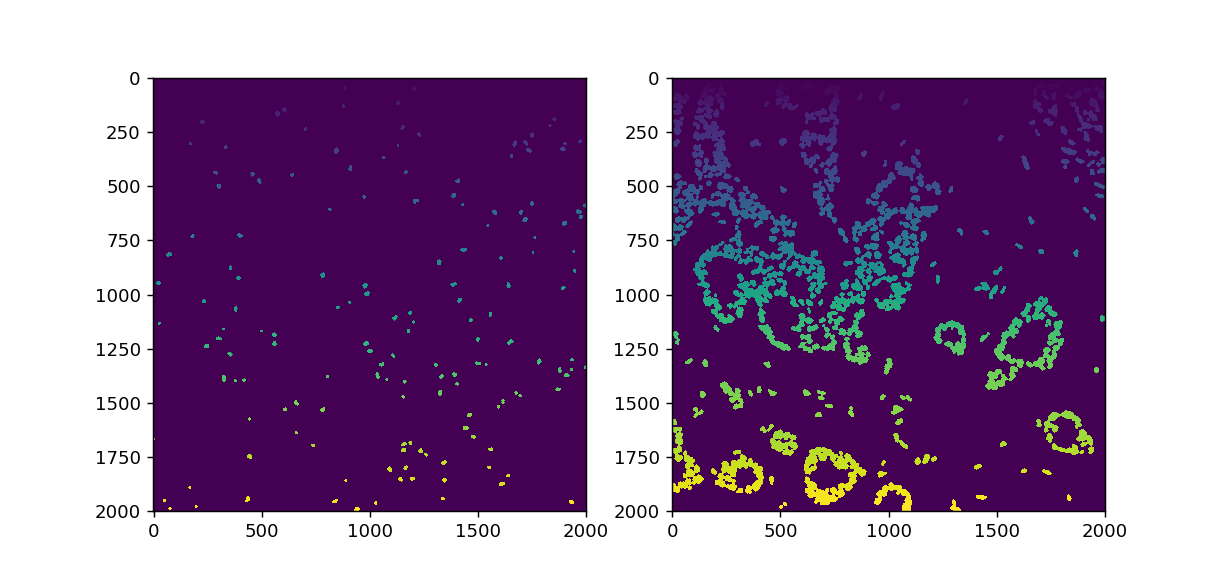

In [28]:
from skimage.filters.rank import gradient
from skimage.measure import label
from skimage.segmentation import mark_boundaries
from skimage.morphology import watershed, disk

grad = gradient(mask,disk(1))
markers = label(peak_local_max(distance, min_distance=3, indices=False))
ws = watershed(grad,markers,mask=mask)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(lab_small)
plt.subplot(1,2,2)
plt.imshow(ws)
plt.show()

<IPython.core.display.Javascript object>


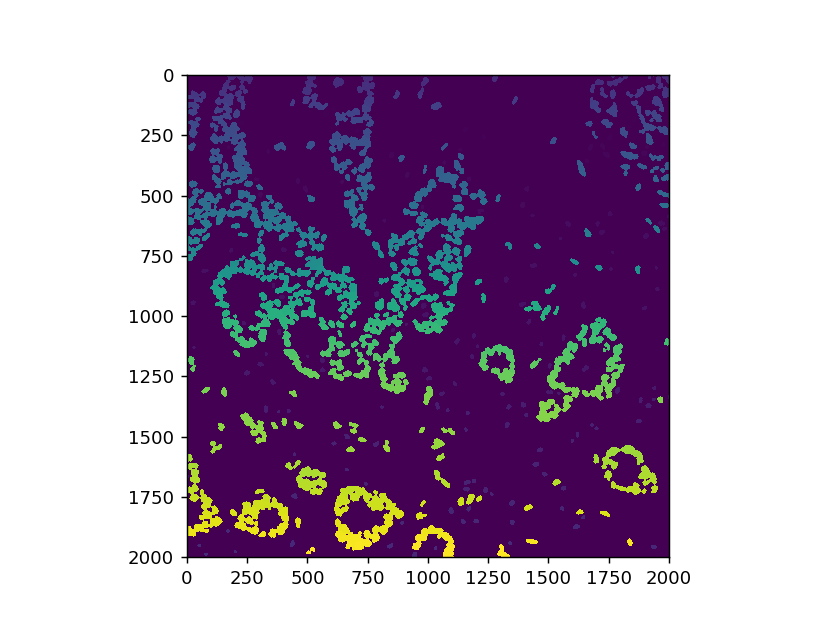

<IPython.core.display.Javascript object>


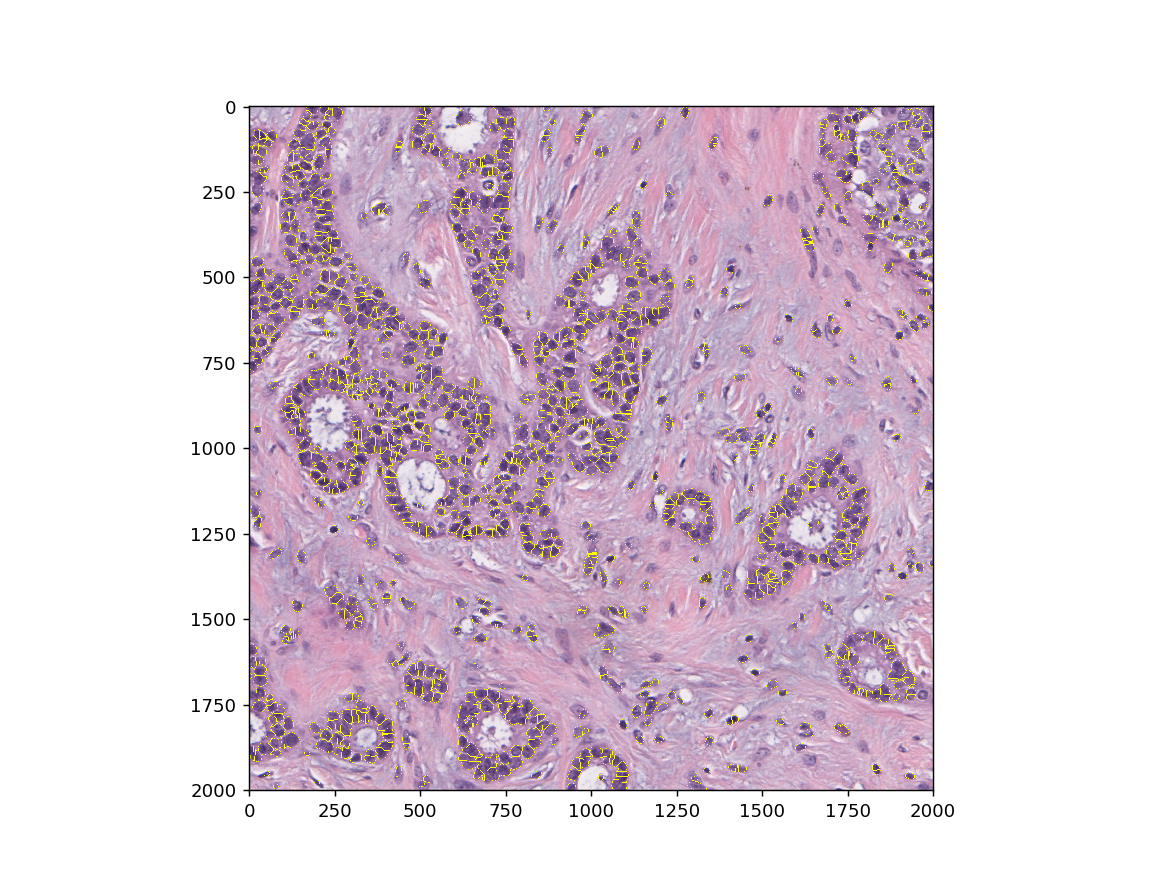

In [29]:
# Re-labeling:
lab_small_2 = label(lab_small>0)
lab_large_2 = ws + lab_small_2.max()

lab_merge = lab_small_2.copy()
lab_merge[ws>0] = lab_large_2[ws>0]

plt.figure()
plt.imshow(lab_merge)
plt.show()
plt.figure()
plt.imshow(mark_boundaries(im,lab_merge))
plt.show()

In [30]:
print(lab_merge.max())

1320


<IPython.core.display.Javascript object>


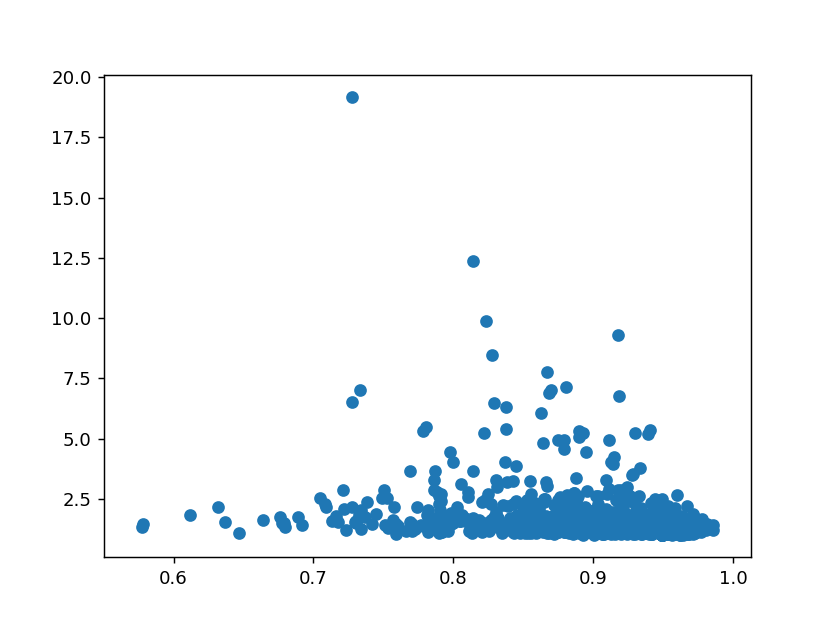

In [31]:
props = regionprops(lab_merge)
features = np.zeros((lab_merge.max(),3))
for obj in props:
    features[obj.label-1,:] = [obj.solidity, (obj.major_axis_length+1)/(obj.minor_axis_length+1), obj.area]

plt.figure()
plt.scatter(features[:,0], features[:,1])
plt.show()

<IPython.core.display.Javascript object>


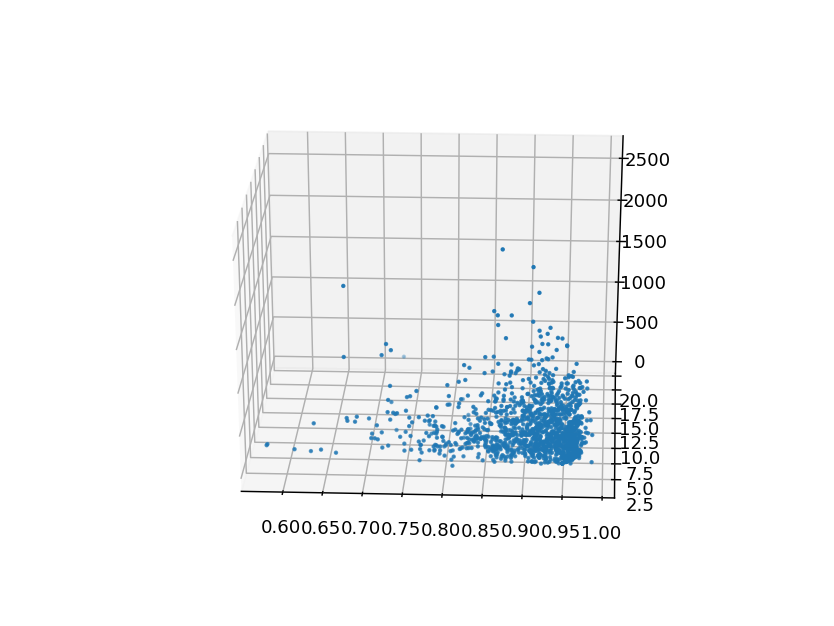

In [32]:
scatter_3d(features)